**Project Understanding**

Project Goal: Develop a movie recommendation system capable of suggesting five movies to a new user based on their provided ratings.

Dataset: Utilize the MovieLens dataset to train and evaluate the recommendation model.

Methodology: Primarily employ collaborative filtering techniques, with potential exploration of hybrid approaches (content-based filtering) to address cold start issues.

Evaluation: Employ appropriate regression metrics (RMSE, MAE, etc.) to assess the model's performance in predicting user ratings.

Business Problem: Enhance user experience by providing personalized movie recommendations, potentially increasing user engagement and satisfaction on a movie recommendation platform.

In [1]:
import pandas as pd

In [2]:
# loading data
df_movie = pd.read_csv('movies.csv')
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
# Function to check duplicates
def data_exploration(dataset):
    # Check for duplicates
    duplicates = dataset[dataset.duplicated()]
    if not duplicates.empty:
        print("Duplicate rows:")
        print(duplicates)
    else:
        print("No duplicates found.")
    
    # Print dataset information
    print("\nDataset Information:")
    dataset.info()
    
    # Check for null values
    null_values = dataset.isnull().sum()
    if null_values.sum() > 0:
        print("\nNull values per column:")
        print(null_values)
    else:
        print("\nNo null values found.")
    
    # Check unique values in 'movie_id' column
    unique_movie_ids = dataset['movieId'].unique()
    print("\nUnique values in 'movieId' column:")
    print(unique_movie_ids)
    
    # Optionally, you can return any specific information or results if needed
    return duplicates, null_values, unique_movie_ids



In [4]:
data_exploration(df_movie)

No duplicates found.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

No null values found.

Unique values in 'movieId' column:
[     1      2      3 ... 193585 193587 193609]


(Empty DataFrame
 Columns: [movieId, title, genres]
 Index: [],
 movieId    0
 title      0
 genres     0
 dtype: int64,
 array([     1,      2,      3, ..., 193585, 193587, 193609], dtype=int64))

**Rating Dataset**

In [5]:
df_rating = pd.read_csv('ratings.csv')
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
data_exploration(df_rating)

No duplicates found.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

No null values found.

Unique values in 'movieId' column:
[     1      3      6 ... 160836 163937 163981]


(Empty DataFrame
 Columns: [userId, movieId, rating, timestamp]
 Index: [],
 userId       0
 movieId      0
 rating       0
 timestamp    0
 dtype: int64,
 array([     1,      3,      6, ..., 160836, 163937, 163981], dtype=int64))

In [7]:
# All datasets the unique identifier in all of them is the movieid column

In [8]:
# Check how many movies in ratings have corresponding entries in movies
common_movies = df_rating[df_rating['movieId'].isin(df_movie['movieId'])]

# Calculate the percentage of ratings with corresponding movie entries
percentage_related = len(common_movies) / len(df_rating) * 100

print(f"Percentage of ratings with corresponding movies: {percentage_related:.2f}%")

Percentage of ratings with corresponding movies: 100.00%


**Links Dataset**


In [9]:
df_links = pd.read_csv('links.csv')
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [10]:
data_exploration(df_links)

No duplicates found.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB

Null values per column:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Unique values in 'movieId' column:
[     1      2      3 ... 193585 193587 193609]


(Empty DataFrame
 Columns: [movieId, imdbId, tmdbId]
 Index: [],
 movieId    0
 imdbId     0
 tmdbId     8
 dtype: int64,
 array([     1,      2,      3, ..., 193585, 193587, 193609], dtype=int64))

In [11]:
# Check how many movies in ratings have corresponding entries in movies
common_movies = df_rating[df_rating['movieId'].isin(df_links['movieId'])]

# Calculate the percentage of ratings with corresponding movie entries
percentage_related = len(common_movies) / len(df_rating) * 100

print(f"Percentage of ratings with corresponding movies: {percentage_related:.2f}%")

Percentage of ratings with corresponding movies: 100.00%


**Tags Dataset**

In [12]:
df_tags = pd.read_csv('tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [13]:
data_exploration(df_tags)

No duplicates found.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB

No null values found.

Unique values in 'movieId' column:
[ 60756  89774 106782 ...   6107   7936   3265]


(Empty DataFrame
 Columns: [userId, movieId, tag, timestamp]
 Index: [],
 userId       0
 movieId      0
 tag          0
 timestamp    0
 dtype: int64,
 array([ 60756,  89774, 106782, ...,   6107,   7936,   3265], dtype=int64))

In [14]:
# Check how many movies in ratings have corresponding entries in movies
common_movies = df_links[df_links['movieId'].isin(df_tags['movieId'])]

# Calculate the percentage of ratings with corresponding movie entries
percentage_related = len(common_movies) / len(df_rating) * 100

print(f"Percentage of ratings with corresponding movies: {percentage_related:.2f}%")

Percentage of ratings with corresponding movies: 1.56%


**Left Merging**

Merging the datasets since they have a common key movieid with corresponding 100% in three  datasets.
Merging Datasets:

pd.merge() is used to merge ratings_df and movies_df on the movieId column (on='movieId').
how='left' specifies a left join, meaning all rows from ratings_df are included, and matching rows from movies_df are appended where movieId values match.

In [15]:
# merge first two of them
# Merge DataFrames on 'movieid' column with left join
# First merge: df_rating and df_movie on 'movieId' column
merged_df = pd.merge(df_rating, df_movie, on='movieId', how='left')

# Second merge: merged_df and df_links on 'movieId' column
data = pd.merge(merged_df, df_links, on='movieId', how='left')


In [16]:
data

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,4972582,381288.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,5052448,419430.0
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0


In [17]:
data_exploration(data)

No duplicates found.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB

Null values per column:
userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
imdbId        0
tmdbId       13
dtype: int64

Unique values in 'movieId' column:
[     1      3      6 ... 160836 163937 163981]


(Empty DataFrame
 Columns: [userId, movieId, rating, timestamp, title, genres, imdbId, tmdbId]
 Index: [],
 userId        0
 movieId       0
 rating        0
 timestamp     0
 title         0
 genres        0
 imdbId        0
 tmdbId       13
 dtype: int64,
 array([     1,      3,      6, ..., 160836, 163937, 163981], dtype=int64))

In [18]:
# Check how many movies in ratings have corresponding entries in movies
common_movies = data[data['movieId'].isin(df_tags['movieId'])]

# Calculate the percentage of ratings with corresponding movie entries
percentage_related = len(common_movies) / len(df_rating) * 100

print(f"Percentage of ratings with corresponding movies: {percentage_related:.2f}%")

Percentage of ratings with corresponding movies: 47.89%


**Exploratory Data Analysis/Feature Engeenering**

In [19]:
data

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,4972582,381288.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,5052448,419430.0
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0


In [20]:
#Create another column on year produced
data['year_produced'] = data['title'].str[-5:-1]
# create a column with just movie it self to determine the movies produced s series
data['movie'] = data['title'].str[0:-6]
data

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,year_produced,movie
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1995,Toy Story
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,1995,Grumpier Old Men
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0,1995,Heat
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,1995,Seven (a.k.a. Se7en)
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,1995,"Usual Suspects, The"
...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,4972582,381288.0,2017,Split
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0,2017,John Wick: Chapter Two
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,5052448,419430.0,2017,Get Out
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,2017,Logan


Comedy                       7196
Drama                        6291
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: genres, dtype: int64


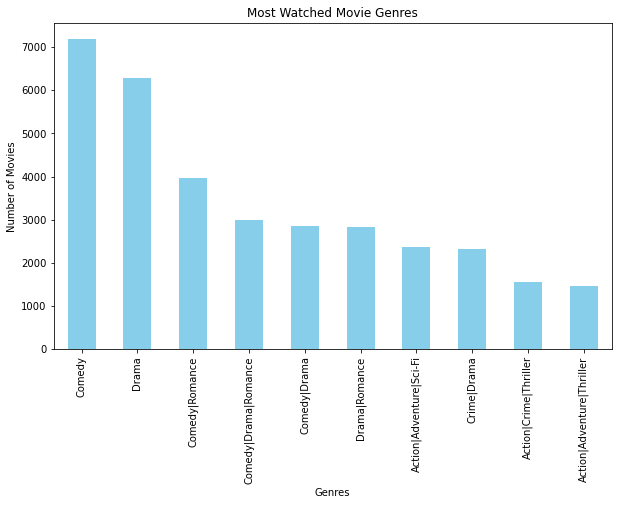

In [21]:
## Visualization on the most watched genre.
import matplotlib.pyplot as plt
movie_gen= data['genres'].value_counts()
movie_genres = movie_gen.sort_values(ascending= False).head(10)
print(movie_genres)

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
movie_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Most Watched Movie Genres')

plt.show()




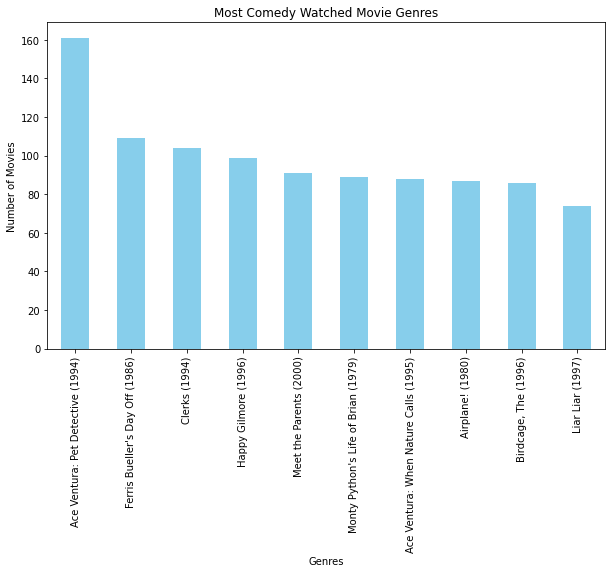

In [22]:
# Filter the dataset to only include comedy
most_comedy_watched = data[data['genres'] == 'Comedy']
top_ten_comedy = most_comedy_watched['title'].value_counts().sort_values(ascending = False).head(10)
top_ten_comedy

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
top_ten_comedy.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Most Comedy Watched Movie Genres')

plt.show()

                        
                                



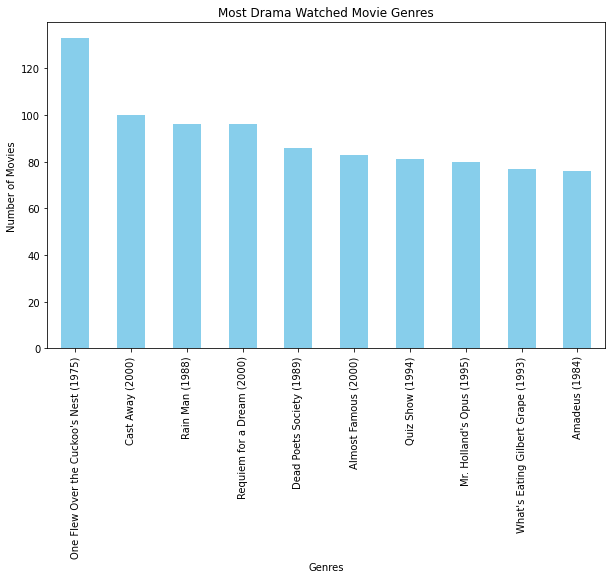

In [23]:
# Filter the dataset to only include comedy
most_comedy_watched = data[data['genres'] == 'Drama']
top_ten_comedy = most_comedy_watched['title'].value_counts().sort_values(ascending = False).head(10)
top_ten_comedy

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
top_ten_comedy.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Most Drama Watched Movie Genres')

plt.show()

In [24]:
# the movie that has alot of series
alot_series_movie = data['movie'].value_counts()
alot_series_movie

Forrest Gump                      329
Shawshank Redemption, The         317
Pulp Fiction                      307
Silence of the Lambs, The         279
Matrix, The                       278
                                 ... 
Fourth Protocol, The                1
Beastly                             1
Hazard                              1
Jeff Dunham: All Over the Map       1
Get on the Bus                      1
Name: movie, Length: 9445, dtype: int64

In [25]:
forrest_Gump = data[data['movie'] == 'Forrest Gump']
forrest_Gump

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,year_produced,movie


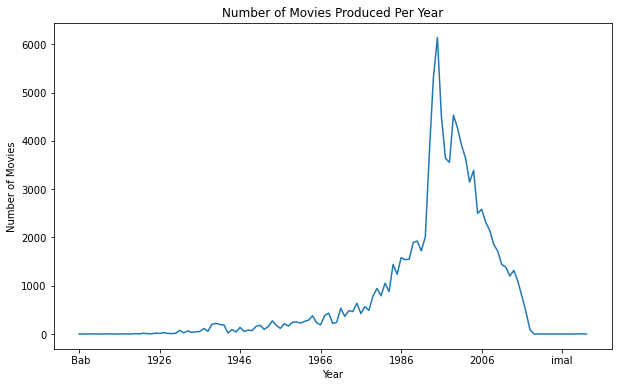

In [26]:
# Draw a line plot using temp_data
movies_per_year = data['year_produced'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='line')
plt.title('Number of Movies Produced Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [27]:
yeara = data['year_produced'].unique()
yeara

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', 'irro', '1934',
       '995)', '1916', '1908', '1932', '1921', '1925', '1929', '1917',
       'atso', ' Bab', 'ron ', '1915', '1924', '1903', 'r On', 'lon ',
      

**Recomendation System using Suprise**

A hybrid recommendation system leverages the strengths of both item-based and user-based approaches to overcome their individual limitations and deliver more accurate, diverse, and robust recommendations.

In [28]:
# creating a database for the necessary columns
data_rec = data[['userId', 'movieId', 'rating']]
data_rec

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


**Model Based Approaches**
building a predictive model, based on historical data. Model trained using machine learning technology


In [29]:
#Transform the dataset into something comptatible with surprise
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(data_rec,reader)


In [30]:
# check no of users
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


# Collaborative Filterating for Reccommendation System

**Using Surprise**

Surprise is a Python library specifically designed for building and analyzing recommender systems. 

In [31]:
# Necessary  libraries for memory Based
#  dont require to train dataset it depends on the whole dataset
# identify users or items that are similar
# rem to split the data, or one can use cross validation
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

In [32]:
#For my Baseline model i will use train_test split
# Split into train and test set
trainset, testset = train_test_split(data, test_size=0.2)

In [33]:
print(len(testset))
print(testset[0])

20168
(477, 8253, 4.5)


In [34]:
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")

Number of users:  610 

Number of items:  8922 



Dataset has fewer users than items, you should set "user_based =  False": True in your similarity configuration, and vice verser when 
use different similarities metrics different similarity metrics, ie cosine, pearson, and msd, 

similarities import cosine, msd, pearson, then i will choose the best

**Choosing the Best Algorithm**

If you need a simple and quick baseline model, start with KNNBasic.

If you want to improve the accuracy by accounting for user biases, normalization use KNNWithMeans.

If you need the best performance and can handle the additional complexity, use KNNBaseline, normalization accounts for both user and item biasness

Dataset has fewer users than items, you should set "user_based": True in your similarity configuration, and vice verser when 
use different similarities metrics different similarity metrics, ie cosine, pearson, and msd, 

similarities import cosine, msd, pearson, then i will choose the best


# Memory Based Approach
Relies on similarity between users or items to make recommendations.




# Model1

**Baseline Model**

**KNNBasic** based collobarative Filtering, easy to implent and not complex.

In [35]:
import surprise
print(surprise.__version__)

1.1.1


In [36]:
#pip install --upgrade surprise

In [37]:
from surprise import accuracy

def best_KNNBasic(sim_options, trainset, testset):
  """
  This function evaluates a KNNBasic model with different similarity options
  and calculates various performance metrics.

  Args:
      sim_options: Dictionary containing similarity metric options.
      trainset: Surprise trainset object.
      testset: Surprise testset object.

  Returns:
      A dictionary containing various performance metrics.
  """

  # Create a KNNBasic model with the provided similarity options
  knn = KNNBasic(sim_options=sim_options)

  # Fit the model to the training set
  knn.fit(trainset)

  # Test the model on the testing set
  predictions = knn.test(testset)

  # Calculate various evaluation metrics
  rmse = accuracy.rmse(predictions)
  mae = accuracy.mae(predictions)
 

  # Print the results
  print(f"Evaluation for {sim_options['name']} similarity:")
  print(f"  RMSE: {rmse}")
  print(f"  MAE: {mae}")


  # Return a dictionary containing all metrics
  return {
      "rmse": rmse,
      "mae": mae,
    
  }

In [38]:
sim_cosine = {"name": "cosine", "user_based": False}
best_KNNBasic(sim_cosine, trainset, testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9701
MAE:  0.7571
Evaluation for cosine similarity:
  RMSE: 0.9701403915730981
  MAE: 0.7571077181280663


{'rmse': 0.9701403915730981, 'mae': 0.7571077181280663}

In [39]:
sim_pearson = {"name": "pearson", "user_based": False}
best_KNNBasic(sim_pearson, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9623
MAE:  0.7489
Evaluation for pearson similarity:
  RMSE: 0.9622521028233856
  MAE: 0.7489043680430207


{'rmse': 0.9622521028233856, 'mae': 0.7489043680430207}

In [40]:
sim_MSD = {'name': 'msd', 'user_based': False}
best_KNNBasic(sim_MSD, trainset, testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9049
MAE:  0.6976
Evaluation for msd similarity:
  RMSE: 0.9049364017910415
  MAE: 0.6976180539908123


{'rmse': 0.9049364017910415, 'mae': 0.6976180539908123}

**KNNBasic Model Results**

Best Similarity Metric Based on RMSE and MAE
The similarity metric that yields the **lowest** RMSE and MAE values is considered the best choice for your KNN-based recommendation system.

Hence the best is **SIM_SMD**

# Model 2

Improvement of model1

**KNNBaseline**

Why KNNBaseline Might Be Better


1. Improved Predictions: By incorporating a baseline estimate, KNNBaseline often provides more accurate predictions, especially when dealing with sparse datasets or when there are significant differences in rating distributions across users or items.
2. Handling Cold Start Problem: The baseline estimate can help in addressing the cold start problem ie there's insufficient data available to make accurate predictions or recommendations, hence providing a reasonable prediction for new users or items.



**Use Cross Validation**

Using Cross-Validation with KNNBaseline is Good Practice
Cross-validation is an excellent practice when working with KNNBaseline models. It helps to:

1. Prevent overfitting: By splitting the data into multiple folds, you can assess how well your model generalizes to unseen data.
2. Optimize hyperparameters: You can experiment with different hyperparameter values (like k, min_k, similarity metrics) and select the combination that yields the best performance.
3. Evaluate model performance reliably: Cross-validation provides a more robust estimate of model performance compared to a single train-test split.

In [41]:
from surprise.model_selection import cross_validate
from surprise import KNNBaseline
import numpy as np

In [42]:
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':False})
cv_knn_baseline = cross_validate(knn_baseline,data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [43]:
import numpy as np

for i in cv_knn_baseline.items():
    print(i)

print(np.mean(cv_knn_baseline['test_rmse']))
print(np.mean(cv_knn_baseline['test_mae']))


('test_rmse', array([0.88029233, 0.87745358, 0.88052233, 0.88114344, 0.87882004]))
('test_mae', array([0.67669331, 0.67599951, 0.67554177, 0.67843495, 0.67489906]))
('fit_time', (56.04608678817749, 54.433634519577026, 49.28650665283203, 52.48196220397949, 64.22618126869202))
('test_time', (26.912440299987793, 33.26220917701721, 18.806347846984863, 30.469412803649902, 26.079829931259155))
0.8796463434002701
0.6763137207972622


In [44]:
knn_baseline = KNNBaseline(sim_options={'name':'cosine', 'user_based':False})
cv_knn_baseline = cross_validate(knn_baseline,data)

import numpy as np

for c in cv_knn_baseline.items():
    print(c)

print(np.mean(cv_knn_baseline['test_rmse']))
print(np.mean(cv_knn_baseline['test_mae']))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
('test_rmse', array([0.88429529, 0.89247696, 0.89355141, 0.89178311, 0.89145439]))
('test_mae', array([0.68397276, 0.68642127, 0.68724636, 0.68510823, 0.68828705]))
('fit_time', (44.272279024124146, 44.3029146194458, 46.05306124687195, 51.00594639778137, 54.13388228416443))
('test_time', (23.08003830909729, 24.063787937164307, 26.872196435928345, 25.89785408973694, 26.343032360076904))
0.8907122340285761
0.6862071363313379


In [45]:
knn_baseline = KNNBaseline(sim_options={'name':'msd', 'user_based':False})
cv_knn_baseline = cross_validate(knn_baseline,data)

import numpy as np

for s in cv_knn_baseline.items():
    print(s)

print(np.mean(cv_knn_baseline['test_rmse']))
print(np.mean(cv_knn_baseline['test_mae']))

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
('test_rmse', array([0.86346312, 0.86463811, 0.87541937, 0.86674449, 0.86530759]))
('test_mae', array([0.6637581 , 0.66092532, 0.66945446, 0.6655652 , 0.66295755]))
('fit_time', (14.411779403686523, 13.469095468521118, 11.82634973526001, 14.163487911224365, 10.937431812286377))
('test_time', (26.426161527633667, 25.283602237701416, 26.75308585166931, 25.90415620803833, 24.214802742004395))
0.8671145333221153
0.664532124043558


# Model Based Aprroach



# Model3

**SVD (Singular Value Decomposition)**

why SVD, 
1. Model-based approach: Builds a mathematical model of user-item interactions.
2. Latent factors: Discovers underlying patterns or latent factors that explain user preferences and item characteristics.
3. Global perspective: Considers all users and items to generate recommendations.
4. Computational efficiency: Generally faster for large datasets due to matrix operations.
5. Cold-start problem: Can handle cold-start problems to some extent by leveraging latent factors.

In [46]:
from surprise.prediction_algorithms import SVD

In [47]:
svd_model = SVD()
results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Perform cross-validation with both MAE and RMSE


# Access mean RMSE and MAE
mean_rmse = np.mean(results['test_rmse'])
mean_mae = np.mean(results['test_mae'])

print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8667  0.8744  0.8760  0.8752  0.8755  0.8736  0.0035  
MAE (testset)     0.6667  0.6724  0.6741  0.6739  0.6710  0.6716  0.0027  
Fit time          11.01   10.61   10.43   12.54   11.36   11.19   0.75    
Test time         0.64    0.34    0.59    0.44    0.54    0.51    0.11    
Mean RMSE: 0.8735573876388795
Mean MAE: 0.6716085452637264


In [48]:
# from surprise.model_selection import GridSearchCV
# params = {'n_factors': [20, 50, 100],
#          'reg_all': [0.02, 0.05, 0.1]}
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
# g_s_svd.fit(data)

In [49]:
# print(g_s_svd.best_score)
# print(g_s_svd.best_params)

{'rmse': 0.8695823507869187, 'mae': 0.66876377477922}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}


In [50]:
# params = {
#     'n_factors': [50, 100, 150, 200],
#     'reg_all': [0.01, 0.02, 0.05, 0.1],
#     'lr_all': [0.005, 0.01, 0.02]
# }

# # Grid search with more folds
# gs = GridSearchCV(SVD, param_grid=params, cv=5, n_jobs=-1)
# gs.fit(data)

# # Best parameters and RMSE
# print(gs.best_score)
# print(gs.best_params)

KeyboardInterrupt: 

In [51]:

new_model = SVD(n_factors =  200, reg_all =  0.1, lr_all = 0.02)
best_results = cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Perform cross-validation with both MAE and RMSE


# Access mean RMSE and MAE
mean_rmse = np.mean(best_results['test_rmse'])
mean_mae = np.mean(best_results['test_mae'])

print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8724  0.8693  0.8727  0.8743  0.8781  0.8734  0.0029  
MAE (testset)     0.6698  0.6675  0.6709  0.6723  0.6759  0.6713  0.0028  
Fit time          13.52   12.95   12.45   13.50   13.32   13.15   0.40    
Test time         0.33    0.34    0.45    0.44    0.42    0.40    0.05    
Mean RMSE: 0.8733585554033223
Mean MAE: 0.6712809626325971


# Hybrid Approach
using collaborative filtering as the primary mechanism, but using content-based filtering to address the cold start problem

In [53]:
# come up with content based approach
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd



# 1. Content-Based Filtering (CBF) - Using Genres
tfidf_genres = TfidfVectorizer(stop_words='english')
tfidf_genres_matrix = tfidf_genres.fit_transform(df_movie['genres'])

# Compute cosine similarity based on genres
cosine_sim_genres = cosine_similarity(tfidf_genres_matrix, tfidf_genres_matrix)

# 2. Content-Based Filtering (CBF) - Using Tags
# Combine tags by movieId
df_movie['tags'] = df_tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x))
df_movie['tags'] = df_movie['tags'].fillna('')

tfidf_tags = TfidfVectorizer(stop_words='english')
tfidf_tags_matrix = tfidf_tags.fit_transform(df_movie['tags'])

# Compute cosine similarity based on tags
cosine_sim_tags = cosine_similarity(tfidf_tags_matrix, tfidf_tags_matrix)

# 3. Recommendation Function
def get_recommendations_by_genres(movie_id, top_n=5):
    idx = df_movie.index[df_movie['movieId'] == movie_id][0]
    sim_scores = list(enumerate(cosine_sim_genres[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df_movie.iloc[movie_indices][['movieId', 'title', 'genres']]

def get_recommendations_by_tags(movie_id, top_n=5):
    idx = df_movie.index[df_movie['movieId'] == movie_id][0]
    sim_scores = list(enumerate(cosine_sim_tags[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return df_movie.iloc[movie_indices][['movieId', 'title', 'tags']]

# Example usage
movie_id_example = 1  # Toy Story (1995)

# Recommendations based on genres
print("Recommendations based on genres:")
print(get_recommendations_by_genres(movie_id_example))

# Recommendations based on tags
print("\nRecommendations based on tags:")
print(get_recommendations_by_tags(movie_id_example))

# Explanation of Changes:
# - Dataframe Name: Updated `df_movies` to `df_movie` to match your dataframe.
# - Import Statements: Included the necessary imports at the beginning of the code.


Recommendations based on genres:
      movieId                                           title  \
1706     2294                                     Antz (1998)   
2355     3114                              Toy Story 2 (1999)   
2809     3754  Adventures of Rocky and Bullwinkle, The (2000)   
3000     4016                Emperor's New Groove, The (2000)   
3568     4886                           Monsters, Inc. (2001)   

                                           genres  
1706  Adventure|Animation|Children|Comedy|Fantasy  
2355  Adventure|Animation|Children|Comedy|Fantasy  
2809  Adventure|Animation|Children|Comedy|Fantasy  
3000  Adventure|Animation|Children|Comedy|Fantasy  
3568  Adventure|Animation|Children|Comedy|Fantasy  

Recommendations based on tags:
   movieId                               title  \
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride 

In [ ]:
# incooporate both models



In [59]:
# 1. SVD Model (Collaborative Filtering)
new_model = SVD(n_factors=200, reg_all=0.1, lr_all=0.02)
trainset = data.build_full_trainset()
new_model.fit(trainset)

# 2. Content-Based Filtering (CBF) - Using Genres and Tags
tfidf_genres = TfidfVectorizer(stop_words='english')
tfidf_genres_matrix = tfidf_genres.fit_transform(df_movie['genres'])
cosine_sim_genres = cosine_similarity(tfidf_genres_matrix, tfidf_genres_matrix)

tfidf_tags = TfidfVectorizer(stop_words='english')
tfidf_tags_matrix = tfidf_tags.fit_transform(df_movie['tags'])
cosine_sim_tags = cosine_similarity(tfidf_tags_matrix, tfidf_tags_matrix)

# 3. Hybrid Recommendation Function
def hybrid_recommendations(user_ratings, top_n=5, weight_cf=0.7, weight_cbf=0.3):
    """
    user_ratings: A list of tuples [(movieId, rating), ...] provided by the new user
    top_n: Number of recommendations to return
    weight_cf: Weight given to CF model predictions
    weight_cbf: Weight given to CBF similarity scores
    """
    # Aggregate CF predictions
    cf_scores = np.zeros(len(df_movie))
    
    for movie_id, rating in user_ratings:
        # Get index of the movie
        idx = df_movie.index[df_movie['movieId'] == movie_id][0]
        
        # CF prediction for each movie (using the SVD model)
        predicted_rating = new_model.predict(0, movie_id).est
        
        # Content-Based Filtering similarity scores
        sim_scores_genres = cosine_sim_genres[idx]
        sim_scores_tags = cosine_sim_tags[idx]
        
        # Combine the content-based scores (weighted average of genres and tags)
        combined_sim_scores = 0.5 * sim_scores_genres + 0.5 * sim_scores_tags
        
        # Aggregate the scores (CF + CBF)
        cf_scores += weight_cf * predicted_rating + weight_cbf * combined_sim_scores
    
    # Get top N movie recommendations
    movie_indices = np.argsort(cf_scores)[::-1][:top_n]
    return df_movie.iloc[movie_indices][['movieId', 'title', 'genres']]


In [63]:
# Example usage:
user_ratings_example = [(6, 4.0), (22, 5.0)]  # A new user has rated two movies

# Get hybrid recommendations for the new user
recommendations = hybrid_recommendations(user_ratings_example)
recommendations_df = pd.DataFrame(recommendations)
recommendations_df

,movieId,title,genres
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
5,6,Heat (1995),Action|Crime|Thriller
8366,109241,On the Other Side of the Tracks (De l'autre cô...,Action|Comedy|Crime
5167,8369,Mindhunters (2004),Action|Crime|Horror|Mystery|Thriller
9193,150548,Sherlock: The Abominable Bride (2016),Action|Crime|Drama|Mystery|Thriller


**Choosing the best model to make predictions**

Best CL approach model is called new_model

**Creating a content based model**

we use columns that describe the items themselves ie

1. Title: The movie's title can be used, especially if you plan to consider similarities based on movie names.
2. Genres: This is one of the most important features. You can use genres to find similarities between movies.
3. Year Produced: Depending on your approach, you might use this to recommend movies from a specific era.

In [ ]:
# df_movie

In [ ]:
# # Combine title and genres into a single string feature
# df_movie['combined_features'] = df_movie['title'] + ' ' + df_movie['genres']


In [ ]:
# # vectorize the combined features
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Vectorize the combined features
# tfidf = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf.fit_transform(df_movie['combined_features'])


In [ ]:
# # calculate cosine similarity
# from sklearn.metrics.pairwise import cosine_similarity

# # Compute the cosine similarity matrix
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
# Create a function to get movie recommendations based on the similarity scores
# def get_recommendations(title, cosine_sim=cosine_sim, df=df_movie):
#     # Get the index of the movie that matches the title
#     idx = df[df['title'] == title].index[0]
    
#     # Get the pairwise similarity scores of all movies with that movie
#     sim_scores = list(enumerate(cosine_sim[idx]))
    
#     # Sort the movies based on the similarity scores
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
#     # Get the scores of the 10 most similar movies
#     sim_scores = sim_scores[1:11]
    
#     # Get the movie indices
#     movie_indices = [i[0] for i in sim_scores]
    
#     # Return the top 10 most similar movies
#     return df['title'].iloc[movie_indices]


In [ ]:
# # Example usage:
# recommendations = get_recommendations("Toy Story (1995)")
# print(recommendations)

**Combibing the two models**

In [ ]:
# # Example: Predict the rating a specific user might give to a specific movie
# user_id = 1  # Replace with actual user ID
# movie_id = 1  # Replace with actual movie ID (this should match 'movieId' in your DataFrame)

# cf_prediction = best_model.predict(user_id, movie_id).est


In [ ]:
# cross validating with KNNBaseline
def KNNBaseline_CV(sim_options, data):
  """
  This function evaluates a KNNBasic model with different similarity options
  using cross-validation and calculates various performance metrics.

  Args:
      sim_options: Dictionary containing similarity metric options.
      data: Surprise Dataset object.

  Returns:
      A dictionary containing average RMSE and MAE across all folds.
  """

  # Define evaluation metrics
  measures = ['RMSE', 'MAE']

  # Perform cross-validation
  results = cross_validate(KNNBaseline(sim_options=sim_options), data, measures=measures, cv=5)

  # Calculate average RMSE and MAE across all folds
  avg_rmse = sum(fold['est'] for fold in results) / len(results)
  avg_mae = sum(fold['est'] for fold in results) / len(results)

  # Print results (optional)
  print(f"Evaluation for {sim_options['name']} similarity (average across 5 folds):")
  print(f"  RMSE: {avg_rmse}")
  print(f"  MAE: {avg_mae}")

  # Return dictionary with average metrics
  return {
      "rmse": avg_rmse,
      "mae": avg_mae,
  }

In [ ]:
sim_cosine = {"name": "cosine", "user_based": False}
KNNBaseline_CV(sim_cosine, data)

In [ ]:
def KNNBaseline_CV(sim_options, data):
  """
  This function evaluates a KNNBasic model with different similarity options
  using cross-validation and calculates various performance metrics.

  Args:
      sim_options: Dictionary containing similarity metric options.
      data: Surprise Dataset object.

  Returns:
      A dictionary containing average RMSE and MAE across all folds.
  """

  # Define evaluation metrics
  measures = ['rmse', 'mae']

  # Perform cross-validation
  results = cross_validate(KNNBaseline(sim_options=sim_options), data, measures=measures, cv=5)

  # Calculate average RMSE and MAE across all folds
  avg_rmse = sum(fold['test_rmse'] for fold in results) / len(results)
  avg_mae = sum(fold['test_mae'] for fold in results) / len(results)

  # Print results (optional)
  print(f"Evaluation for {sim_options['name']} similarity (average across 5 folds):")
  print(f"  RMSE: {avg_rmse}")
  print(f"  MAE: {avg_mae}")

  # Return dictionary with average metrics
  return {
      "rmse": avg_rmse,
      "mae": avg_mae,
  }

**Choosing the Best Algorithm**

If you need a simple and quick baseline model, start with KNNBasic.

If you want to improve the accuracy by accounting for user biases, use KNNWithMeans.

If you need the best performance and can handle the additional complexity, use KNNBaseline

In [ ]:
# dataset has fewer users than items, you should set "user_based": True in your similarity configuration, and vice verser when 
# use different similarities metrics different similarity metrics, ie cosine, pearson, and msd, # similarities import cosine, msd, pearson
